#**Data preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import random
import numpy as np
import torch

# multivariate data preparation
from numpy import array

##**data visualisiation**

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

def plot_dataset(df, title):
    data = []
    value = go.Scatter(
        x=df.Time,
        y=df.RealTimePrice,
        mode="lines",
        name="RealTimePrice",
        marker=dict(),
        text=df.index,
        line=dict(color="rgba(0,0,0, 0.3)"),
    )
    data.append(value)

    layout = dict(
        title=title,
        xaxis=dict(title="Date", ticklen=5, zeroline=True),
        yaxis=dict(title="Price", ticklen=5, zeroline=True),
    )

    fig = dict(data=data, layout=layout)
    iplot(fig)
    

##**visualization of electricty price**

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/My Drive/IESO.xlsx')


In [ ]:
df = df.drop('DayofWeek',1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Time  Year  Month  Day  DW  Hour  RealTimePrice  TotalLoad
0  2015-01-01 00:00  2015      1    1   4     0           3.28     14.960
1  2015-01-01 01:00  2015      1    1   4     1           0.00     14.476
2  2015-01-01 02:00  2015      1    1   4     2           0.00     13.979
3  2015-01-01 03:00  2015      1    1   4     3           0.00     13.670
4  2015-01-01 04:00  2015      1    1   4     4           0.00     13.567

In [ ]:
plot_dataset(df, title='Price of electricity in Ontorio province')

In [ ]:
df['index'] = range(0, len(df))
df = df.set_index(['index'])

In [ ]:
df.pop("Time")

index
0        2015-01-01 00:00
1        2015-01-01 01:00
2        2015-01-01 02:00
3        2015-01-01 03:00
4        2015-01-01 04:00
5        2015-01-01 05:00
6        2015-01-01 06:00
7        2015-01-01 07:00
8        2015-01-01 08:00
9        2015-01-01 09:00
10       2015-01-01 10:00
11       2015-01-01 11:00
12       2015-01-01 12:00
13       2015-01-01 13:00
14       2015-01-01 14:00
15       2015-01-01 15:00
16       2015-01-01 16:00
17       2015-01-01 17:00
18       2015-01-01 18:00
19       2015-01-01 19:00
20       2015-01-01 20:00
21       2015-01-01 21:00
22       2015-01-01 22:00
23       2015-01-01 23:00
24       2015-01-02 00:00
25       2015-01-02 01:00
26       2015-01-02 02:00
27       2015-01-02 03:00
28       2015-01-02 04:00
29       2015-01-02 05:00
30       2015-01-02 06:00
31       2015-01-02 07:00
32       2015-01-02 08:00
33       2015-01-02 09:00
34       2015-01-02 10:00
35       2015-01-02 11:00
36       2015-01-02 12:00
37       2015-01-02 13:00
38    

In [ ]:
df_features = df.iloc[:, [0,1,2,3,4,6,5]]


In [ ]:
df_features.head()

Year  Month  Day  DW  Hour  TotalLoad  RealTimePrice
index                                                      
0      2015      1    1   4     0     14.960           3.28
1      2015      1    1   4     1     14.476           0.00
2      2015      1    1   4     2     13.979           0.00
3      2015      1    1   4     3     13.670           0.00
4      2015      1    1   4     4     13.567           0.00

##**train-val-test split**

In [ ]:
train_size = int(len(df_features)*0.70)      #defining the training proportion
valid_size = int(len(df_features)*0.18)

#seperating train,validation, and test set
df_train, df_val, df_test = df_features[:train_size], df_features[train_size+1:train_size + valid_size], df_features[train_size + valid_size+1:]
df_train.shape, df_val.shape, df_test.shape

((36825, 7), (9468, 7), (6313, 7))

In [ ]:
df_features.head()

Year  Month  Day  DW  Hour  TotalLoad  RealTimePrice
index                                                      
0      2015      1    1   4     0     14.960           3.28
1      2015      1    1   4     1     14.476           0.00
2      2015      1    1   4     2     13.979           0.00
3      2015      1    1   4     3     13.670           0.00
4      2015      1    1   4     4     13.567           0.00

In [ ]:
df_train.head()

Year  Month  Day  DW  Hour  TotalLoad  RealTimePrice
index                                                      
0      2015      1    1   4     0     14.960           3.28
1      2015      1    1   4     1     14.476           0.00
2      2015      1    1   4     2     13.979           0.00
3      2015      1    1   4     3     13.670           0.00
4      2015      1    1   4     4     13.567           0.00

##**normalizing dataset**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train),index = df_train.index, columns = df_train.columns)
df_val = pd.DataFrame(scaler.transform(df_val),index = df_val.index, columns = df_val.columns)
df_test = pd.DataFrame(scaler.transform(df_test),index = df_test.index, columns = df_test.columns)

In [ ]:
df_train.head()

Year  Month  Day   DW      Hour  TotalLoad  RealTimePrice
index                                                           
0       0.0    0.0  0.0  0.5  0.000000   0.366634       0.037227
1       0.0    0.0  0.0  0.5  0.043478   0.329611       0.035492
2       0.0    0.0  0.0  0.5  0.086957   0.291593       0.035492
3       0.0    0.0  0.0  0.5  0.130435   0.267957       0.035492
4       0.0    0.0  0.0  0.5  0.173913   0.260078       0.035492

## **make a time sequneces**

In [ ]:
df_train = df_train.to_numpy()
df_val = df_val.to_numpy()
df_test = df_test.to_numpy()

In [ ]:
# split a multivariate sequence into samples
from numpy import array
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [ ]:
n_timesteps = 60
X_train_arr, y_train_arr = split_sequences(df_train, n_timesteps)
X_val_arr, y_val_arr = split_sequences(df_val, n_timesteps)
X_test_arr, y_test_arr = split_sequences(df_test, n_timesteps)

In [ ]:
print(X_test_arr.shape, y_test_arr.shape)

(6253, 60, 6) (6253,)


In [ ]:
n_timesteps + len(X_train_arr) == len(df_train)

True

## **data loader in pytorch**

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch

batch_size =64

train_features = torch.Tensor(X_train_arr)
train_targets = torch.Tensor(y_train_arr)
val_features = torch.Tensor(X_val_arr)
val_targets = torch.Tensor(y_val_arr)
test_features = torch.Tensor(X_test_arr)
test_targets = torch.Tensor(y_test_arr)

train = TensorDataset(train_features, train_targets)
val = TensorDataset(val_features, val_targets)
test = TensorDataset(test_features, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle = False, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle = False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle = False, drop_last=True)
test_loader_one = DataLoader(test, batch_size=1, shuffle = False, drop_last=True)

In [ ]:
next(iter(test_loader))[1][0]

tensor(0.0433)

#Deep models based on pytorch

##vanilla RNN

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(RNNModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # RNN layers
        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda().requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, h0 = self.rnn(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)
        return out

##LSTM 

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):#
        super(LSTMModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )#

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda().requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda().requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        # Forward propagation by passing in the input, hidden state, and cell state into the model
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out

##GRU

In [ ]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(GRUModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.layer_dim = layer_dim
        self.hidden_dim = hidden_dim

        # GRU layers
        self.gru = nn.GRU(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().cuda()

        # Forward propagation by passing in the input and hidden state into the model
        out, _ = self.gru(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out

##defining which model should be seleceted


In [ ]:
def get_model(model, model_params):
    models = {
        "rnn": RNNModel,
        "lstm": LSTMModel,
        "gru": GRUModel,
    }
    return models.get(model.lower())(**model_params)

##training the model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

class Optimization:

    def __init__(self, model, loss_fn, optimizer):

        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []
        
    def train_step(self, x, y):

        # Sets model to train mode
        self.model.train()

        # Makes predictions
        yhat = self.model(x)

        # Computes loss
        loss = self.loss_fn(y, yhat.view(-1).cuda())

        # Computes gradients
        loss.backward()

        # Updates parameters and zeroes gradients
        self.optimizer.step()
        self.optimizer.zero_grad()

        # Returns the loss
        return loss.item()

    def train(self, train_loader, val_loader, batch_size, n_epochs, n_features):

        model_path = f'{self.model}_{datetime.now().strftime("%Y-%m-%d %H:%M:%S")}'

        for epoch in range(1, n_epochs + 1):
            batch_losses = []
            for x_batch, y_batch in train_loader:
                x_batch = x_batch.view([batch_size, -1, n_features]).cuda()
                y_batch = y_batch.cuda()
                
                loss = self.train_step(x_batch, y_batch)
                batch_losses.append(loss)
            training_loss = np.mean(batch_losses)
            self.train_losses.append(training_loss)
            
            with torch.no_grad():
                batch_val_losses = []
                for x_val, y_val in val_loader:
                    x_val = x_val.view([batch_size, -1, n_features]).cuda()
                    y_val = y_val.cuda()
                    self.model.eval()
                    yhat = self.model(x_val)
                    val_loss = self.loss_fn(y_val, yhat.view(-1)).item()
                    batch_val_losses.append(val_loss)
                validation_loss = np.mean(batch_val_losses)
                self.val_losses.append(validation_loss)

            if (epoch <= 50) | (epoch % 50 == 0):
                print(
                    f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}"
                )
        
        torch.save(self.model.state_dict(), model_path)

    def evaluate(self, test_loader, batch_size , n_features):

        with torch.no_grad():
            predictions = []
            values = []
            for x_test, y_test in test_loader:
                x_test = x_test.view([batch_size, -1, n_features]).cuda()
                y_test = y_test.cuda()
                #self.model.eval()
                yhat = self.model(x_test)
                yhat = yhat.view(-1)
                predictions.append(yhat.view(-1).item())#.to(device).detach().numpy()
                values.append(y_test.view(-1).item())#.to(device).detach().numpy()

        return predictions, values

    def plot_losses(self):

        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")
        plt.show()
        plt.close()

## Running the model 

[1/50] Training loss: 0.0003	 Validation loss: 0.0002
[2/50] Training loss: 0.0003	 Validation loss: 0.0002
[3/50] Training loss: 0.0003	 Validation loss: 0.0002
[4/50] Training loss: 0.0003	 Validation loss: 0.0002
[5/50] Training loss: 0.0003	 Validation loss: 0.0002
[6/50] Training loss: 0.0002	 Validation loss: 0.0002
[7/50] Training loss: 0.0002	 Validation loss: 0.0002
[8/50] Training loss: 0.0002	 Validation loss: 0.0002
[9/50] Training loss: 0.0002	 Validation loss: 0.0002
[10/50] Training loss: 0.0002	 Validation loss: 0.0002
[11/50] Training loss: 0.0002	 Validation loss: 0.0002
[12/50] Training loss: 0.0002	 Validation loss: 0.0002
[13/50] Training loss: 0.0002	 Validation loss: 0.0002
[14/50] Training loss: 0.0002	 Validation loss: 0.0002
[15/50] Training loss: 0.0002	 Validation loss: 0.0002
[16/50] Training loss: 0.0002	 Validation loss: 0.0002
[17/50] Training loss: 0.0002	 Validation loss: 0.0002
[18/50] Training loss: 0.0002	 Validation loss: 0.0002
[19/50] Training lo

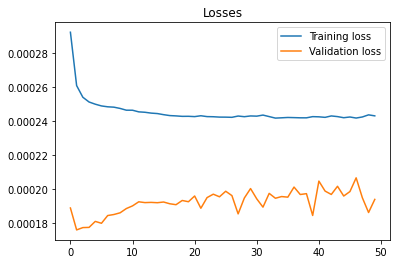

In [ ]:
import torch.optim as optim

input_dim = 6
output_dim = 1
hidden_dim = 128
layer_dim = 2
batch_size = 64
dropout = 0.5
n_epochs = 50
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = get_model('lstm', model_params)

model = model.cuda()

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)


opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader=train_loader, val_loader=val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()

predictions, values = opt.evaluate(
    test_loader_one,
    batch_size=1,
    n_features=input_dim
)

#inversing the scaler 

In [ ]:
#for descaling test df and projection
descaler = MinMaxScaler()
descaler.min_, descaler.scale_ = scaler.min_[-1], scaler.scale_[-1]

In [ ]:
def descale(descaler, values):
    values_2d = np.array(values)[:, np.newaxis]
    return descaler.inverse_transform(values_2d).flatten()

In [ ]:
prediction_descaled = descale(descaler, predictions)
values_descaled = descale(descaler, values)

In [ ]:
values_descaled

array([14.75999731, 12.08000156,  7.07999772, ..., 27.84999998,
       19.68000233, 27.37000001])

#**Illustration of results**

In [ ]:
df1 = pd.read_csv("IESO.csv", parse_dates=['Time'])

test_data = df1[train_size + valid_size+1:]   #redo splitting
test_sequence_data = test_data.iloc[n_timesteps:]

In [ ]:
test_sequence_data

Unnamed: 0                Time  Year  Month  Day  DW  Hour  \
46355       46355 2020-04-15 11:00:00  2020      4   15   3    11   
46356       46356 2020-04-15 12:00:00  2020      4   15   3    12   
46357       46357 2020-04-15 13:00:00  2020      4   15   3    13   
46358       46358 2020-04-15 14:00:00  2020      4   15   3    14   
46359       46359 2020-04-15 15:00:00  2020      4   15   3    15   
...           ...                 ...   ...    ...  ...  ..   ...   
52603       52603 2020-12-31 19:00:00  2020     12   31   4    19   
52604       52604 2020-12-31 20:00:00  2020     12   31   4    20   
52605       52605 2020-12-31 21:00:00  2020     12   31   4    21   
52606       52606 2020-12-31 22:00:00  2020     12   31   4    22   
52607       52607 2020-12-31 23:00:00  2020     12   31   4    23   

       RealTimePrice  TotalLoad  
46355      14.760000     14.182  
46356      12.080000     14.184  
46357       7.080000     14.054  
46358       6.020000     13.848  
46359       7.670000     14.178  
...              ...        ...  
52603      19.690001     16.783  
52604      20.780001     16.154  
52605      27.850000     15.744  
52606      19.680000     15.092  
52607      27.370001     14.665  

[6253 rows x 9 columns]

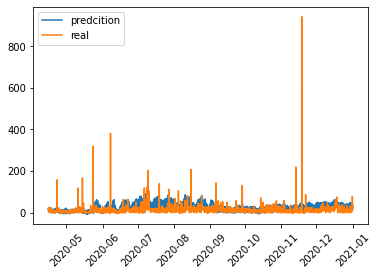

In [ ]:
import matplotlib
dates = matplotlib.dates.date2num(test_sequence_data.Time.tolist())
plt.plot_date(dates, prediction_descaled, "-", label="predcition")
plt.plot_date(dates, values_descaled, "-", label="real")
plt.xticks(rotation = 45)
plt.legend();

#**Amirhossein: LSTM 1**

https://medium.com/@pierre.beaujuge/multivariate-time-series-forecasting-with-a-bidirectional-lstm-building-a-model-geared-to-4f020a160636

In [ ]:
import tensorflow as tf
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import math
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense

In [ ]:
batch_size = 64
buffer_size = X_train_arr.shape[0]
# Provide an infinite dataset
train_iterator = tf.data.Dataset.from_tensor_slices((X_train_arr, y_train_arr)).shuffle(buffer_size).batch(batch_size).repeat()
# Provide an infinite dataset
val_iterator = tf.data.Dataset.from_tensor_slices((X_val_arr, y_val_arr)).batch(batch_size).repeat()

In [ ]:
n_steps = X_train_arr.shape[-2]
n_features = X_train_arr.shape[-1]
# Define the model
model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu', input_shape=(n_steps, n_features))))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
epochs = 10
steps_per_epoch = 800
validation_steps = 80
# Train with an infinite dataset
history = model.fit(train_iterator, epochs=epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=val_iterator,
                    validation_steps=validation_steps)
print('=======================')
model.summary()

Epoch 1/10
800/800 [==============================] - 110s 137ms/step - loss: 2.4535e-04 - val_loss: 5.9219e-05
Epoch 2/10
800/800 [==============================] - 108s 136ms/step - loss: 2.7429e-04 - val_loss: 1.1840e-04
Epoch 3/10
800/800 [==============================] - 108s 136ms/step - loss: 2.1583e-04 - val_loss: 6.6314e-05
Epoch 4/10
800/800 [==============================] - 109s 136ms/step - loss: 2.6626e-04 - val_loss: 7.3928e-05
Epoch 5/10
800/800 [==============================] - 108s 135ms/step - loss: 2.2404e-04 - val_loss: 8.0423e-05
Epoch 6/10
800/800 [==============================] - 108s 136ms/step - loss: 2.2027e-04 - val_loss: 1.0482e-04
Epoch 7/10
800/800 [==============================] - 110s 137ms/step - loss: 2.7335e-04 - val_loss: 7.6780e-05
Epoch 8/10
800/800 [==============================] - 109s 136ms/step - loss: 2.1184e-04 - val_loss: 1.3406e-04
Epoch 9/10
800/800 [==============================] - 109s 136ms/step - loss: 2.1338e-04 - val_loss: 1.3

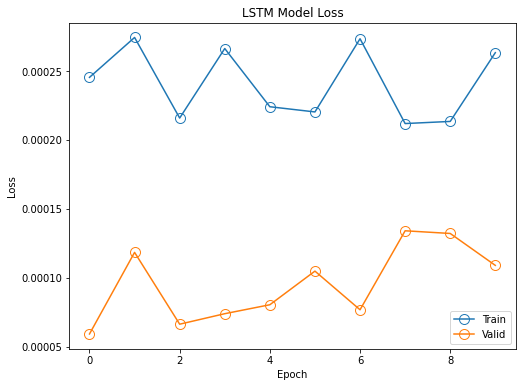

In [ ]:
def plot_1(history, title):
  """function that plots the loss results of the model"""
  plt.figure(figsize=(8,6))
  plt.plot(history.history['loss'], 'o-', mfc='none', markersize=10, 
  label='Train')
  plt.plot(history.history['val_loss'], 'o-', mfc='none', 
  markersize=10, label='Valid')
  plt.title('LSTM Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_2(data_24h, single_label, single_prediction, title):
  """function that plots a single-step price prediction following 
  24h of data"""
  time_steps = list(range(24))
  next_step = 24
  plt.figure(figsize=(8, 6))
  plt.plot(time_steps, data_24h, 'o-', markersize=8, 
  label='data_24h')
  plt.plot(next_step, single_label, 'b+', mfc='none', markersize=12, 
  label='Label')
  plt.plot(next_step, single_prediction, 'ro', mfc='none', 
  markersize=12, label='Prediction')
  plt.title(title)
  plt.xlabel('Time Steps')
  plt.ylabel('Price at Close (Standardized Data)')
  plt.legend()
  plt.show
def plot_3(future, prediction, title):
  """function that plots predictions over "batch_size" x 24h 
  timeframes"""
  days = list(range(1, future.shape[0] + 1))
  plt.figure(figsize=(12, 6))
  plt.plot(days, future, 'o-', markersize=5, mfc='none', 
  label='Labels')
  plt.plot(days, prediction, 'o-', markersize=5, mfc='none', 
  label='Predictions')
  plt.title(title)
  plt.xlim([days[0], days[-1]])
  plt.xlabel('24h Steps')
  plt.ylabel('Price at Close (Standardized Data)')
  plt.legend()
  plt.show
# Plot the model loss results
plot_1(history, 'Training / Validation Losses from History')


In [ ]:
# Make a single-step price prediction following 24h of data
window_num = 0
for batch_num, (x, y) in enumerate(val_iterator.take(3)):
  title = string.format(window_num, batch_num)
  plot_2(x[window_num, :, -2].numpy(),
         y[window_num].numpy(),
         model.predict(x)[window_num],
         title)
# Make predictions over "batch_size" x 24h timeframes
string = 'Predictions over a {} x 24h Timeframe (Batch {})'
for batch_num, (x, y) in enumerate(val_iterator.take(3)):
  title = string.format(batch_size, batch_num)
  plot_3(y.numpy(),
         model.predict(x).reshape(-1),
         title)
  batch_num += 1